In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# importing my personal wrangle module
import wrangle

In [2]:
# Acquiring the data using the above module
zillow = wrangle.get_zillow_data()

In [3]:
# Using my wrangle module to clean and prep the data. NaNs are dropped; so are outliers. 
# In the end, I added an 'age' column and deleted the yearbuilt column (which was more like a categorical variable)
# No outliers were removed from year built, age, or fips
zillow = wrangle.clean_and_prep_data(zillow)

Consider dropping yearbuilt as a column--this is a categorical and is closely related to age, which will be the feature we use instead.

Consider the k value used removing outliers--there are a couple features that may be better with a different value.  I'm thinking of the 1 bedroom houses, for example.

In [4]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,age
6,3.0,4.0,1620.0,847770.0,10244.94,6037.0,10
7,3.0,2.0,2077.0,646760.0,7924.68,6037.0,95
18,3.0,1.0,1244.0,169471.0,2532.88,6037.0,71
19,3.0,2.0,1300.0,233266.0,3110.99,6037.0,71
20,3.0,2.0,1222.0,290492.0,3870.25,6037.0,70


In [5]:
zillow.shape

(1854286, 7)

In [6]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854286 entries, 6 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   taxamount                     float64
 5   fips                          float64
 6   age                           int64  
dtypes: float64(6), int64(1)
memory usage: 113.2 MB


In [7]:
# checking for null values
zillow.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
taxamount                       0
fips                            0
age                             0
dtype: int64

In [8]:
# # This is a for loop that is checking every column for any white space. there isn't any
# # also the NaNs, actually. gone now.
# cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips']
# for col in cols:
#     print(zillow[col].value_counts(dropna=False,ascending=True))

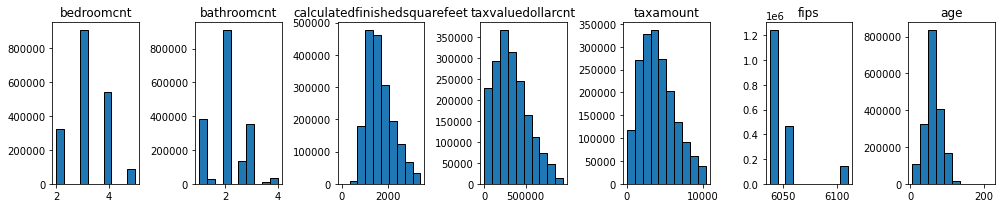

In [9]:
# Here, we create a for loop that makes a histogram for every column. This is the start of my univariate analysis

plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount', 'fips','age']

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,8, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    zillow[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()

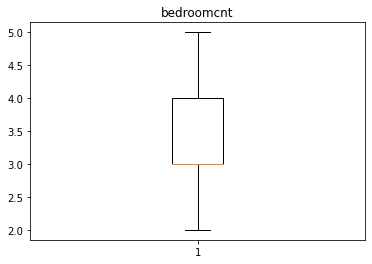

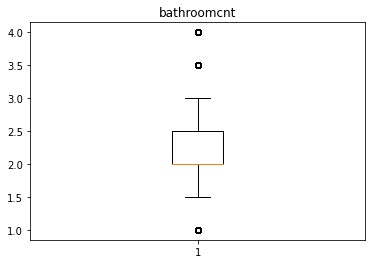

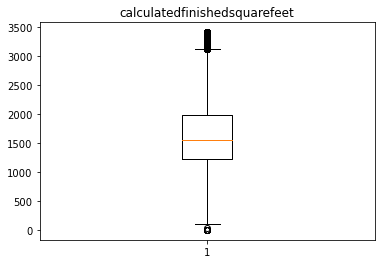

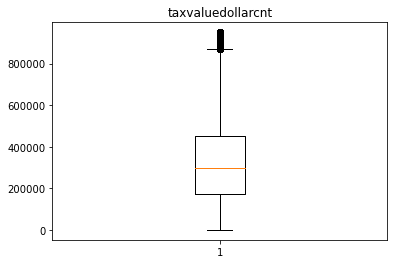

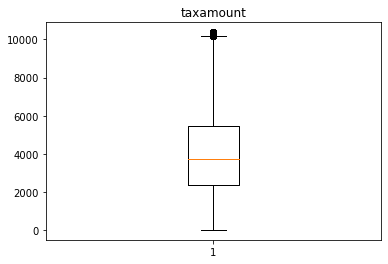

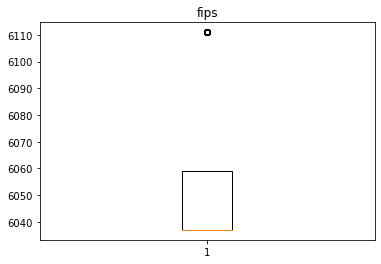

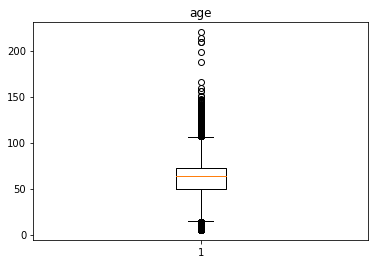

In [10]:
# This cell runs a for loop to visualize a boxplot for every individual variable.

cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount', 'fips', 'age']

for col in cols:
    plt.title(col)
    plt.boxplot(zillow[col])
    plt.show()

In [11]:
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,age
6,3.0,4.0,1620.0,847770.0,10244.94,6037.0,10
7,3.0,2.0,2077.0,646760.0,7924.68,6037.0,95
18,3.0,1.0,1244.0,169471.0,2532.88,6037.0,71
19,3.0,2.0,1300.0,233266.0,3110.99,6037.0,71
20,3.0,2.0,1222.0,290492.0,3870.25,6037.0,70


In [12]:
# Describe was displaying with scientific notation, so I rounded to 2 places.  
round(zillow.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,1854286.0,3.21,0.78,2.00,3.00,3.00,4.00,5.00
bathroomcnt,1854286.0,2.05,0.71,1.00,2.00,2.00,2.50,4.00
calculatedfinishedsquarefeet,1854286.0,1653.71,564.43,1.00,1231.00,1548.00,1988.00,3408.00
taxvaluedollarcnt,1854286.0,327950.34,198952.85,22.00,173849.25,296630.00,452500.00,950835.00
taxamount,1854286.0,4069.36,2242.13,16.48,2366.68,3747.14,5487.42,10377.04
fips,1854286.0,6048.33,20.52,6037.00,6037.00,6037.00,6059.00,6111.00
age,1854286.0,61.56,20.55,5.00,49.00,64.00,72.00,220.00


### Notice the minimum bedrooms is 2.  I'm sure there were some useful one bedrooms before I removed the outliers.
### The minimum of 1 square foot isn't correct and should be addressed after arriving at MVP
### These are homes around in Los Angeles, Ventura, and Orange County, CA

## Next steps: encode columns and split
### Encode the following:
- ['bedroomcnt','bathroomcnt','fips']
- I will not use the yearbuilt in the final analysis, and instead use age, which is almost the same thing for my purposes.

In [18]:
encode_cols = ['bedroomcnt','bathroomcnt','fips']
for col in encode_cols:
#    col_number = i + 1 
    dummy = pd.get_dummies(zillow[col], drop_first=False)
    zillow_test = pd.concat([zillow, dummy], axis=1)
    
zillow_test.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,age,6037.0,6059.0,6111.0
6,3.0,4.0,1620.0,847770.0,10244.94,6037.0,10,1,0,0
7,3.0,2.0,2077.0,646760.0,7924.68,6037.0,95,1,0,0
18,3.0,1.0,1244.0,169471.0,2532.88,6037.0,71,1,0,0
19,3.0,2.0,1300.0,233266.0,3110.99,6037.0,71,1,0,0
20,3.0,2.0,1222.0,290492.0,3870.25,6037.0,70,1,0,0
